# 04 그래프 그리기 <br>
## 04-1 데이터 시각화가 필요한 이유

### [앤스콤 4분할 그래프 살펴보기]

In [1]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [2]:
#%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
dataset_1 = anscombe[anscombe['dataset']=='I']

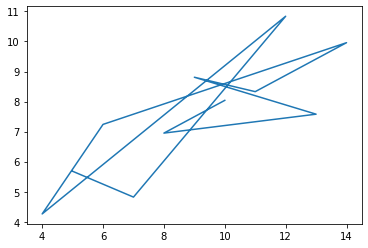

In [4]:
plt.plot(dataset_1['x'], dataset_1['y']) #default: 선으로 그래프 그림

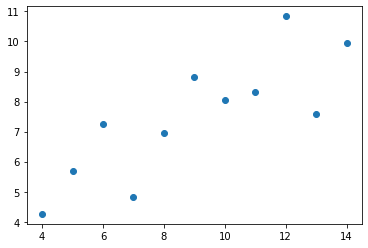

In [5]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o') #'o' 옵션: 점으로 그래프 그림

### [앤스콤 데이터 집합 모두 사용해 그래프 만들기] <br>

- matplotlib 라이브러리로 그래프 그리기
    1. 전체 그래프가 위치할 기본 틀을 만듭니다.
    2. 그래프를 그려 넣을 그래프 격자를 만듭니다.
    3. 그런 다음 격자에 그래프를 하나씩 추가합니다. 격자에 그래프가 추가되는 순서는 왼쪽에서 오른쪽 방향입니다.
    4. 만약 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그래프를 그려 넣습니다.

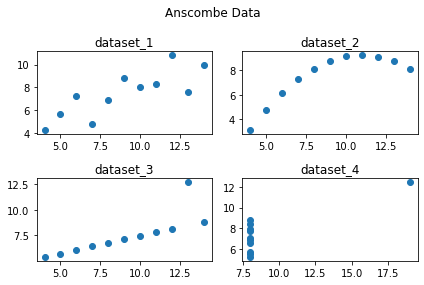

In [6]:
#데이터 저장
dataset_2 = anscombe[anscombe['dataset']=='II']
dataset_3 = anscombe[anscombe['dataset']=='III']
dataset_4 = anscombe[anscombe['dataset']=='IV']

#그래프 격자가 위치할 기본 틀 만들기
fig = plt.figure()

#add_subplot 메소드를 사용하여 그래프 격자 그리기
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

#plot 메소드에 데이터를 전달하여 그래프 그리기 (점의 색상은 매번 실행할 때마다 다를 수 있음)
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

#set_title 메소드를 사용하여 그래프 격자에 제목 추가하기
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

#suptitle 메소드를 사용하여 기본 틀(fig)에 제목 추가하기
fig.suptitle('Anscombe Data')

#tight_layout 메소드를 사용하여 각 그래프의 레이아웃 조절하기
fig.tight_layout()

## 04-2 matplotlib 라이브러리 자유자재로 사용하기 <br>

### [기초 그래프 그리기]

In [7]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Total Bill')

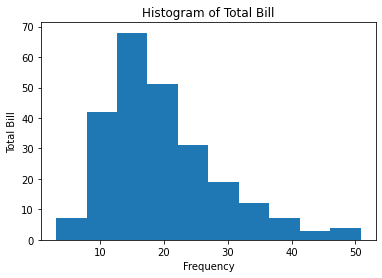

In [8]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

#히스토그램 그리기 (일변량 그래프)
axes1.hist(tips['total_bill'],bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

Text(0, 0.5, 'Tip')

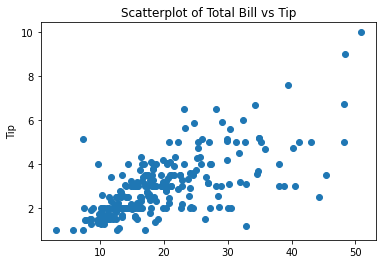

In [9]:
#산점도 그래프 그리기 (이변량 그래프)
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_ylabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

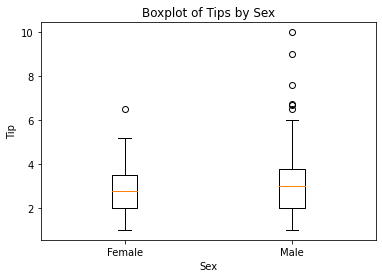

In [10]:
#박스 그래프 그리기 (이산형 변수와 연속형 변수 함께 사용)
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'], #Female의 tip 그래프
              tips[tips['sex'] == 'Male']['tip']], #Male의 tip 그래프
              labels=['Female','Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### [다변량 그래프 그리기] <br>
- 3개 이상의 변수를 사용한 그래프 그리기

Text(0, 0.5, 'Tip')

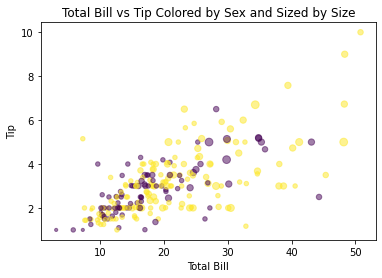

In [11]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10, #size 설정
    c=tips['sex_color'], #color 설정
    alpha=0.5) #투명도 설정
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 04-3 seaborn 라이브러리 자유자재로 사용하기

In [12]:
import seaborn as sns

tips = sns.load_dataset('tips')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

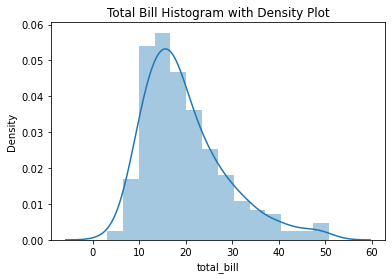

In [13]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill']) #distplot: histogram + density plot
ax.set_title('Total Bill Histogram with Density Plot')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

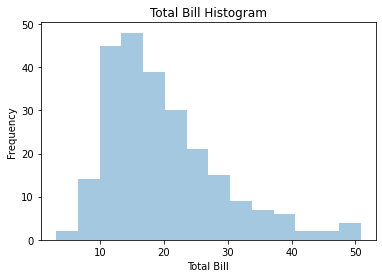

In [14]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False) #kde=False 옵션: density 그래프 제외
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

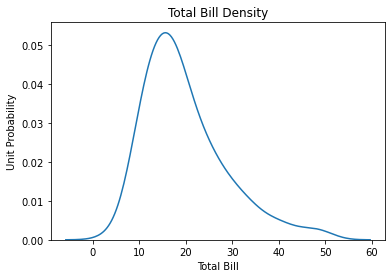

In [15]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False) #hist=False 옵션: histogram 그래프 제외
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

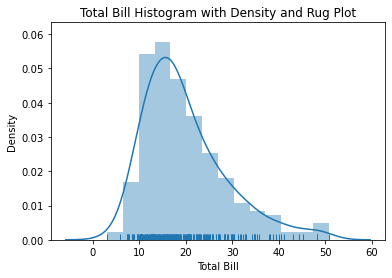

In [16]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True) #rug=True 옵션: rug (양탄자) 그래프 추가
#양탄자 그래프: 그래프의 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현한 그래프
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

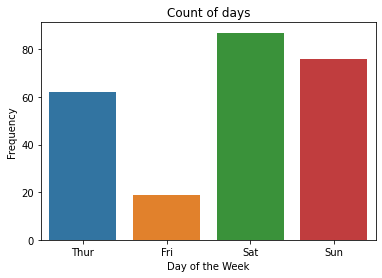

In [17]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips) #day별 count 출력
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Tip')

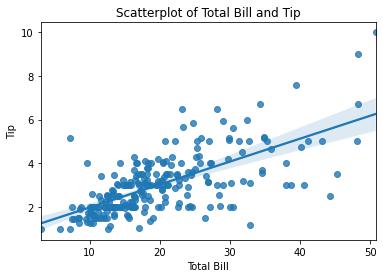

In [18]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips) #regplot: 산점도 그래프 + 회귀선
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

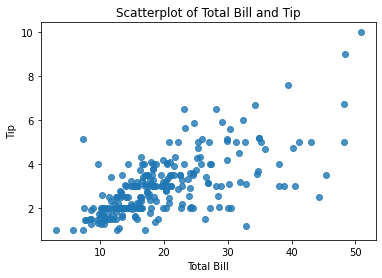

In [19]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) #fit_reg=False 옵션: 회귀선 제거
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

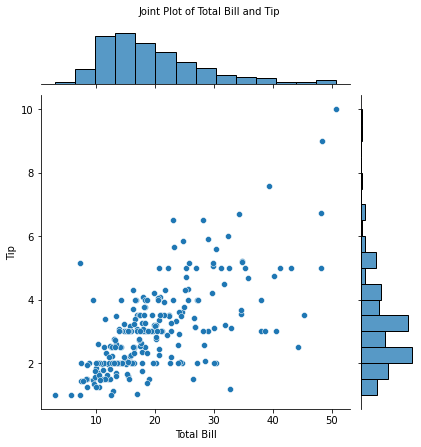

In [20]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips) #jointplot: 산점도 그래프 + 히스토그램
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip') #set_axis_labels 메소드로 xlabel과 ylabel 함께 지정 가능
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03) #y 옵션: 제목의 y 위치 지정

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

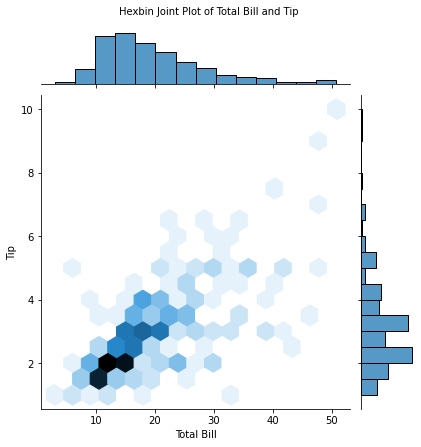

In [21]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex') #kind='hex' 옵션: 육각 그래프 출력
#육각 그래프: 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프로 특정 데이터의 개수가 많아지면 색이 진해짐
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

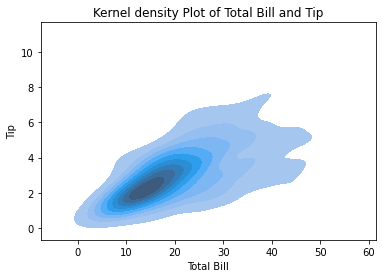

In [22]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'], #kdeplot: 이차원 밀집도 그래프
                data2=tips['tip'],
                shade=True) #shade=True 옵션: 음영 효과 (False면 경계선만 출력)
ax.set_title('Kernel density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Average total bill')

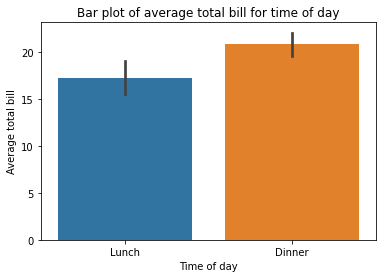

In [23]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips) #barplot: 바 그래프 (y 변수의 평균 계산)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Total bill')

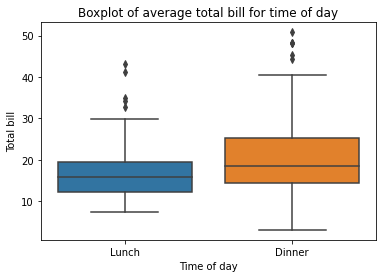

In [24]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips) #boxplot: 박스 그래프 (y 변수의 분포 출력)
ax.set_title('Boxplot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')

Text(0, 0.5, 'Total bill')

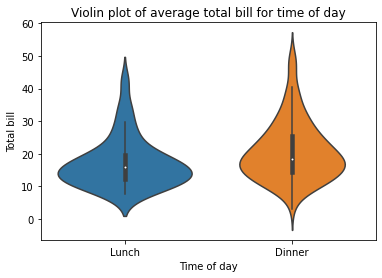

In [25]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips) #violinplot: 바이올린 그래프 (박스 그래프 + 커널 밀도 추정)
ax.set_title('Violin plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')

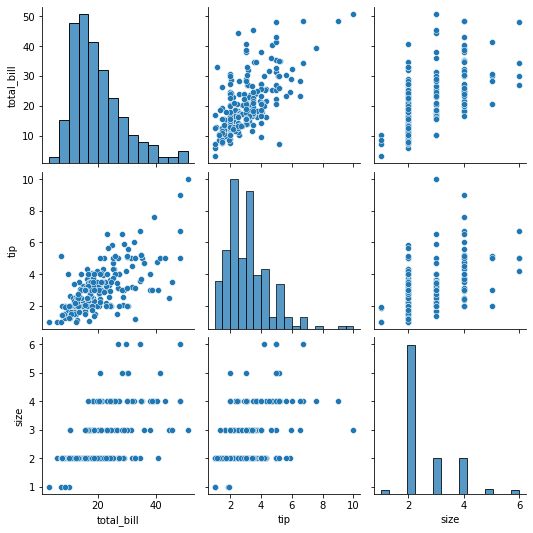

In [26]:
fig = sns.pairplot(tips) #pairplot: 관계 그래프 (대각선을 기준으로 중복된 정보 표현)

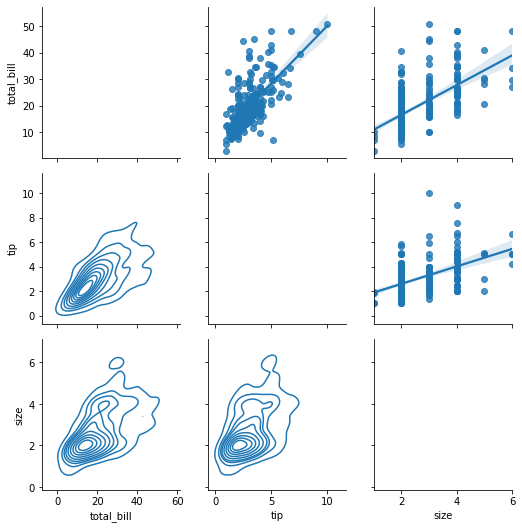

In [27]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) #map_upper: 대각선을 기준으로 위쪽에 regplot 그리기
pair_grid = pair_grid.map_lower(sns.kdeplot) #map_lower: 대각선을 기준으로 아래쪽에 kdeplot 그리기
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) #map_diag: 대각선에 distplot 그리기 (dist 함수의 y 범위가 작기 때문에 안보임)
plt.show()

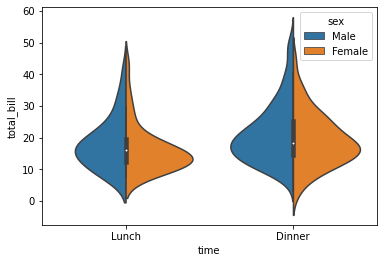

In [28]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
#hue='sex' 옵션: 성별별로 색상 지정, split=True 옵션: 하나의 violin 그래프에서 나누기 (False면 두개로 나눠서 그려짐)

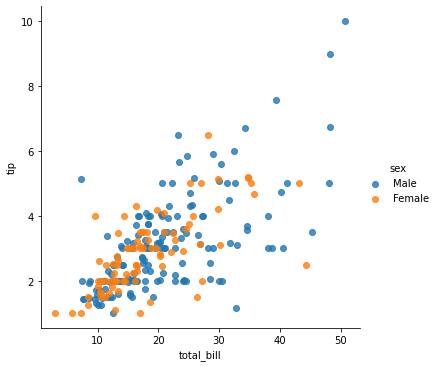

In [29]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)
#sns.lmplot = sns.FacetGrid + sns.regplot

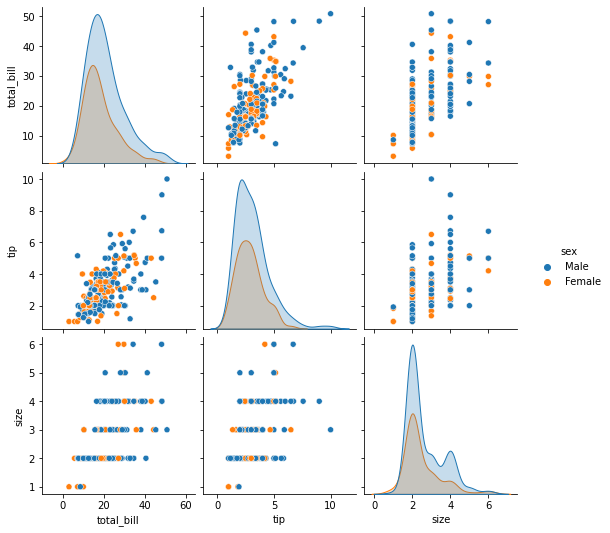

In [30]:
fig = sns.pairplot(tips, hue='sex')

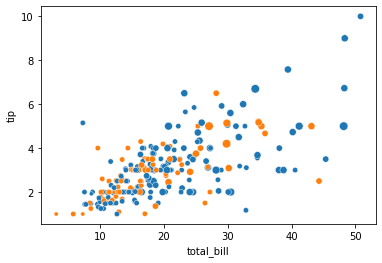

In [31]:
#scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s':tips['size']})
scatter = sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', size=tips['size']*10, legend=False)

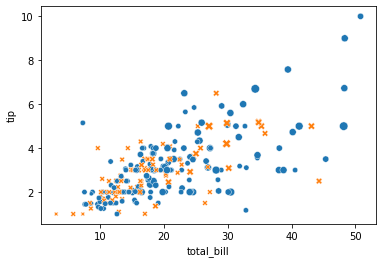

In [32]:
#scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o','x'], scatter_kws={'s':tips['size'*10]})
scatter = sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', style='sex', size=tips['size']*10, legend=False)

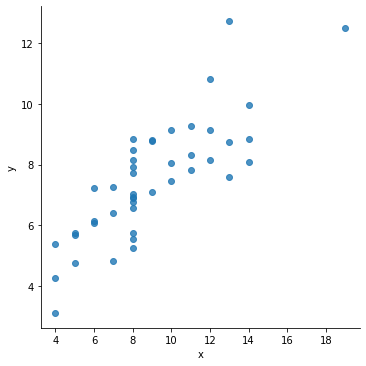

In [33]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

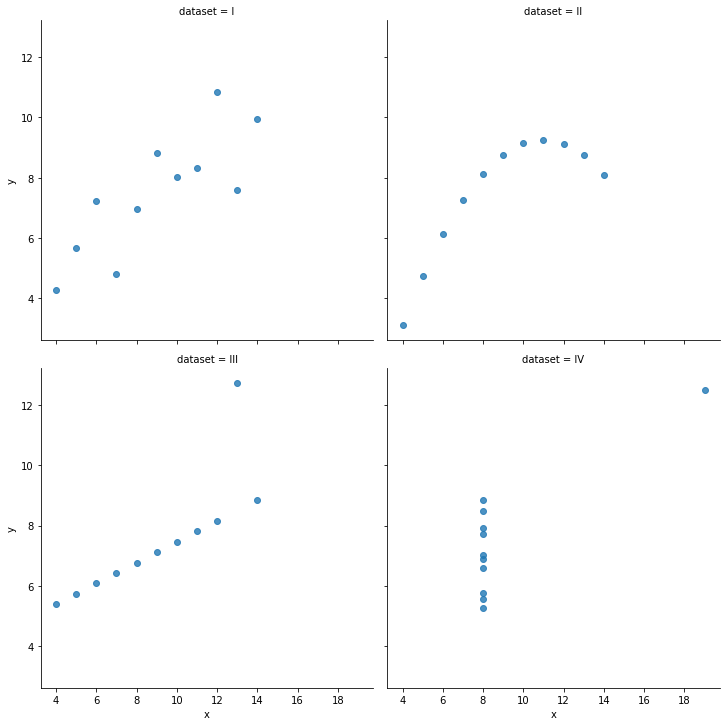

In [34]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)
#col='dataset' 옵션: 데이터 그룹을 구분할 열을 'dataset'으로 지정, col_wrap=2 옵션: 그래프를 그릴 열의 최댓값을 2로 지정

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

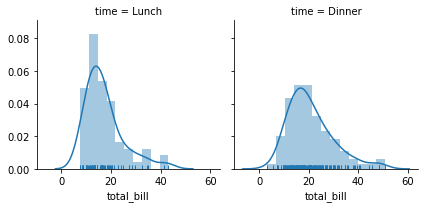

In [35]:
facet = sns.FacetGrid(tips,col='time') #col='time' 옵션: 그룹을 구분할 열을 'time'으로 지정
facet.map(sns.distplot, 'total_bill', rug=True) #그래프의 종류, x축으로 지정할 열 지정, 양탄자 그래프 추가

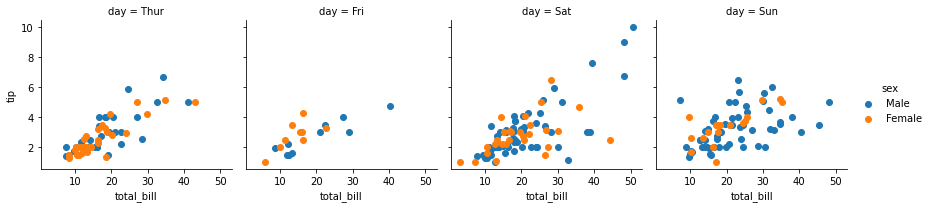

In [36]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

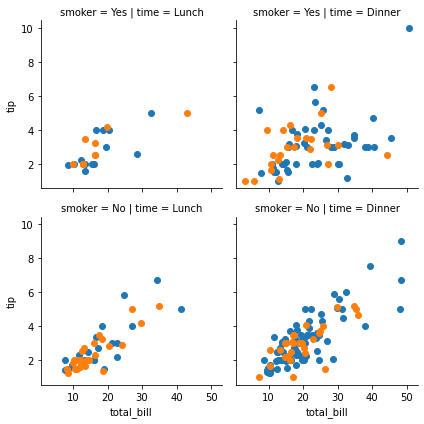

In [37]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') #col, row 옵션을 사용하여 2개의 기준 생성
facet.map(plt.scatter, 'total_bill', 'tip')

## 04-4 데이터프레임과 시리즈로 그래프 그리기

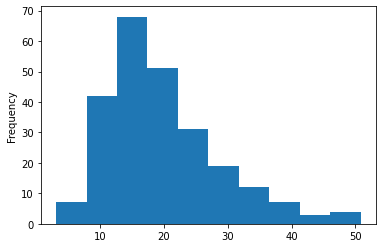

In [38]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

In [ ]:
fig, ax = plt.subplots()
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5,bins=20,ax=ax) #bins=20 옵션: x축의 간격을 20으로 지정

In [ ]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

In [ ]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

In [ ]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

In [ ]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax) #gridsize 옵션: 육각 그래프의 육각형 크기 지정

In [ ]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

## 04-5 seaborn 라이브러리로 그래프 스타일 설정하기

In [ ]:
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

In [ ]:
sns.set_style('whitegrid') #그래프의 배경에 가로줄 스타일 적용
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

In [ ]:
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

#모든 스타일 하나씩 적용
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2,3,plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)
        
fig.tight_layout()

- 더 많은 정보 참고:
    - seaborn documentation
    - matplotlib documentation